In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]

In [4]:
df.describe().transpose()

count         mean          std       min  \
date_id                        8990.0  4494.500000  2595.333794  0.000000   
D1                             8990.0     0.031591     0.174917  0.000000   
D2                             8990.0     0.031591     0.174917  0.000000   
D3                             8990.0     0.047831     0.213420  0.000000   
D4                             8990.0     0.575195     0.494341  0.000000   
...                               ...          ...          ...       ...   
V8                             7984.0     0.303908     0.351109  0.000661   
V9                             4451.0     0.129227     1.277273 -1.497420   
forward_returns                8990.0     0.000469     0.010551 -0.039754   
risk_free_rate                 8990.0     0.000107     0.000088 -0.000004   
market_forward_excess_returns  8990.0     0.000051     0.010568 -0.040582   

                                       25%          50%          75%  \
date_id                        2247.250000  4494.500000  6741.750000   
D1                                0.000000     0.000000     0.000000   
D2                                0.000000     0.000000     0.000000   
D3                                0.000000     0.000000     0.000000   
D4                                0.000000     1.000000     1.000000   
...                                    ...          ...          ...   
V8                                0.000661     0.101025     0.590030   
V9                               -0.738242    -0.170825     0.685907   
forward_returns                  -0.004324     0.000659     0.005900   
risk_free_rate                    0.000008     0.000095     0.000193   
market_forward_excess_returns    -0.004759     0.000252     0.005479   

                                       max  
date_id                        8989.000000  
D1                                1.000000  
D2                                1.000000  
D3                                1.000000  
D4                                1.000000  
...                                    ...  
V8                                1.000000  
V9                               12.997536  
forward_returns                   0.040661  
risk_free_rate                    0.000317  
market_forward_excess_returns     0.040551  

[98 rows x 8 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [6]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [6]:
missing_df = (df.isna().mean() * 100).reset_index()
missing_df.columns = ["column", "missing_percent"]
missing_df = missing_df[missing_df["missing_percent"] > 0].sort_values("missing_percent", ascending=False)

print(missing_df)

   column  missing_percent
27     E7        77.519466
83    V10        67.285873
75     S3        63.770857
39     M1        61.701891
43    M13        61.624027
..    ...              ...
87     V2        11.190211
89     V4        11.190211
88     V3        11.190211
91     V6        11.190211
93     V8        11.190211

[85 rows x 2 columns]


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = df.drop(['M14', 'M6', 'V9'], axis=1)

In [9]:
df = df.drop(['E7', 'V10', 'S3', 'M1', 'M13'], axis=1)

In [10]:
from sklearn.impute import SimpleImputer

M_cols    = [c for c in df.columns if c.startswith("M")]
V_cols    = [c for c in df.columns if c.startswith("V")]
P_cols    = [c for c in df.columns if c.startswith("P")]
E_cols    = [c for c in df.columns if c.startswith("E")]
I_cols    = [c for c in df.columns if c.startswith("I")]
S_cols    = [c for c in df.columns if c.startswith("S")]

cols = M_cols + V_cols + P_cols + E_cols + I_cols + S_cols 

median_imputer = SimpleImputer(strategy="median")
df[cols] = median_imputer.fit_transform(df[cols])

In [11]:
print("Remaining missing values per column:")
print(df.isna().sum().sum())  # Should be 0

Remaining missing values per column:
0


In [12]:
df.head()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...        V2        V3  \
0        0   0   0   0   1   1   0   0   0   1  ...  0.513228  0.492394   
1        1   0   0   0   1   1   0   0   0   1  ...  0.513228  0.492394   
2        2   0   0   0   1   0   0   0   0   1  ...  0.513228  0.492394   
3        3   0   0   0   1   0   0   0   0   0  ...  0.513228  0.492394   
4        4   0   0   0   1   0   0   0   0   0  ...  0.513228  0.492394   

        V4        V5        V6       V7        V8  forward_returns  \
0  0.51918  0.275162  0.180225 -0.09767  0.101025        -0.002421   
1  0.51918  0.275162  0.180225 -0.09767  0.101025        -0.008495   
2  0.51918  0.275162  0.180225 -0.09767  0.101025        -0.009624   
3  0.51918  0.275162  0.180225 -0.09767  0.101025         0.004662   
4  0.51918  0.275162  0.180225 -0.09767  0.101025        -0.011686   

   risk_free_rate  market_forward_excess_returns  
0        0.000301                      -0.003038  
1        0.000303                      -0.009114  
2        0.000301                      -0.010243  
3        0.000299                       0.004046  
4        0.000299                      -0.012301  

[5 rows x 90 columns]

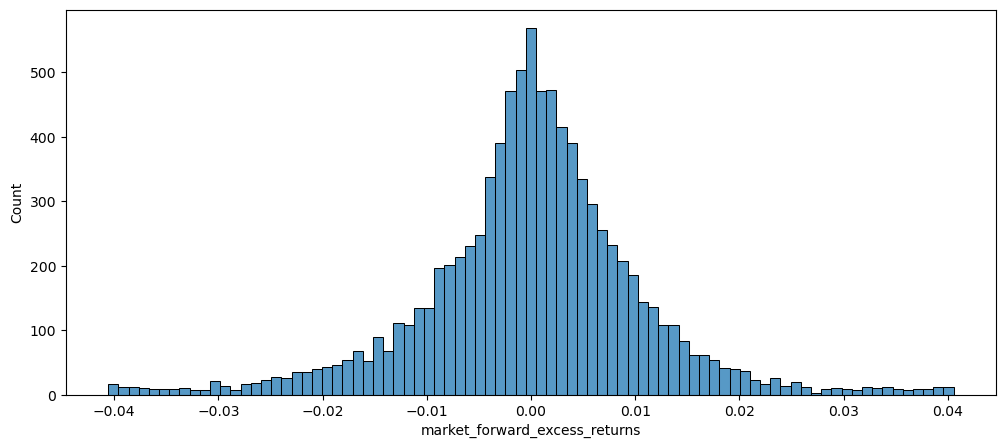

In [13]:
plt.figure(figsize=(12,5))
sns.histplot(df['market_forward_excess_returns'])

plt.show()

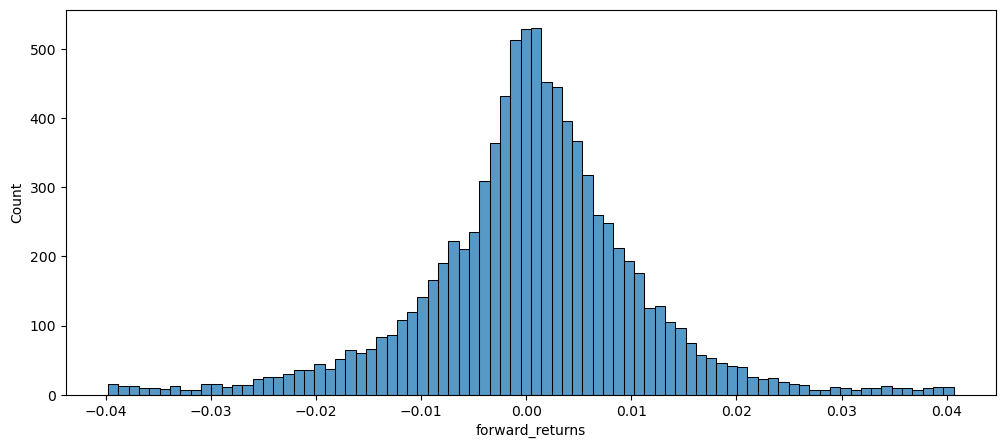

In [14]:
plt.figure(figsize=(12,5))
sns.histplot(df['forward_returns'])

plt.show()

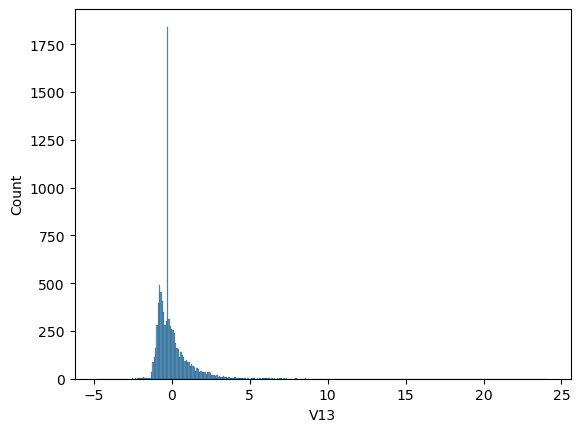

In [15]:
sns.histplot(df['V13'])

plt.show()

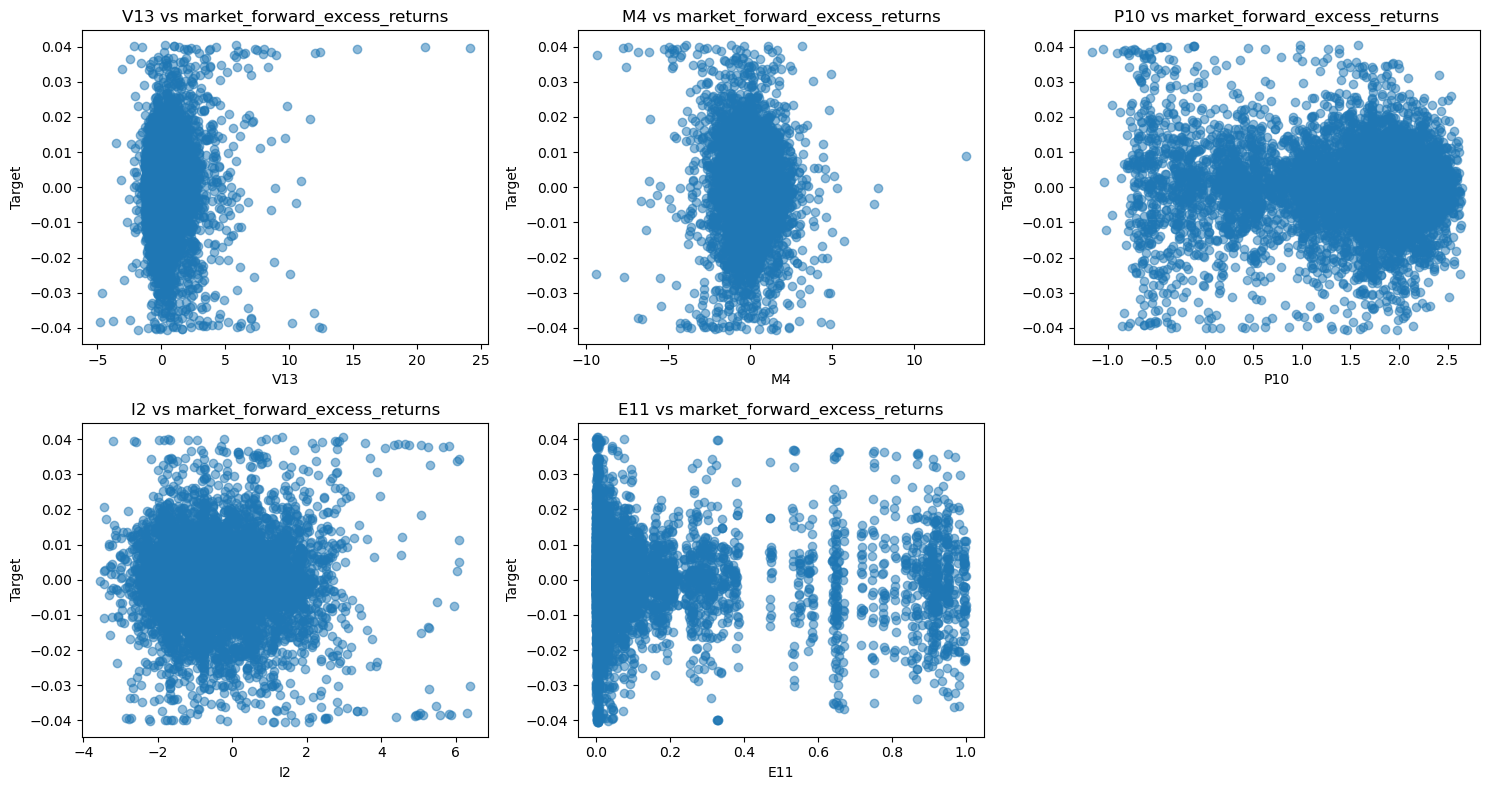

In [16]:
features = ["V13", "M4", "P10", "I2", "E11"]
target = "market_forward_excess_returns"

plt.figure(figsize=(15, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns grid
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

In [17]:
target = "market_forward_excess_returns"
correlations = df.corr()[target].sort_values(ascending=False)

In [18]:
print(correlations.head(20))

market_forward_excess_returns    1.000000
forward_returns                  0.999957
V13                              0.059815
S5                               0.038504
D1                               0.034185
D2                               0.034185
V7                               0.030339
M2                               0.027460
D8                               0.024687
M17                              0.024148
E19                              0.022827
S6                               0.021366
S12                              0.020571
D6                               0.016916
D4                               0.016629
D5                               0.016602
M3                               0.015136
E9                               0.015091
E6                               0.012794
D7                               0.010706
Name: market_forward_excess_returns, dtype: float64


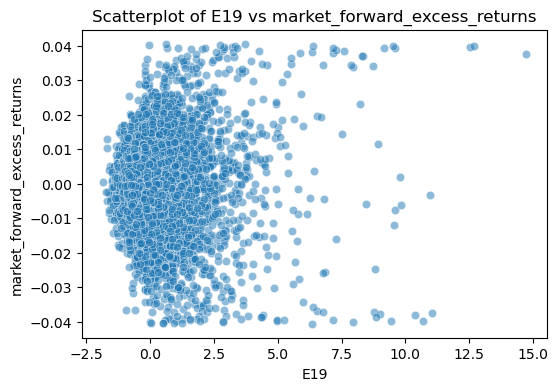

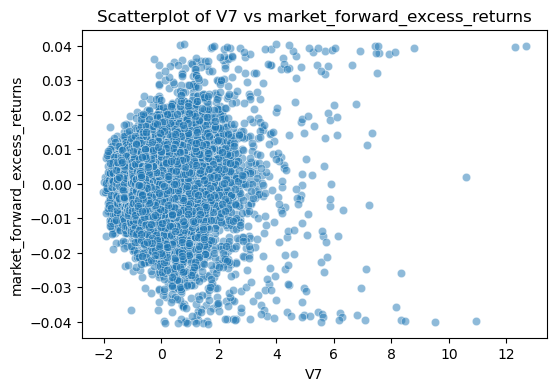

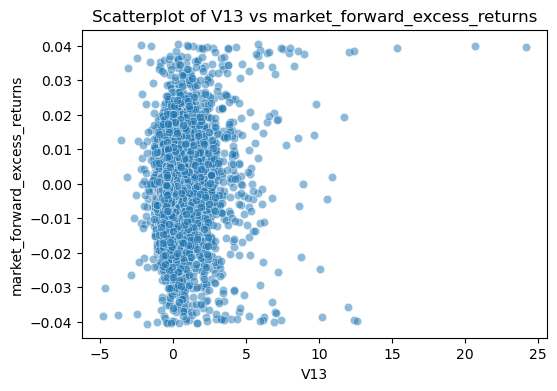

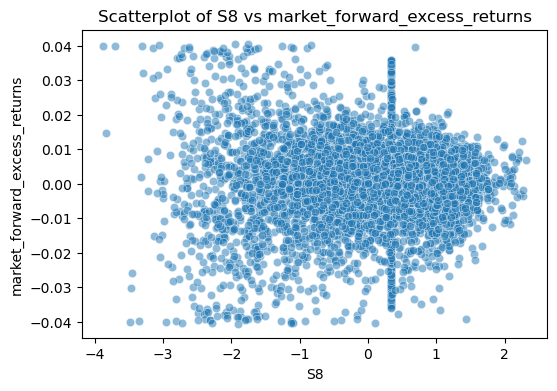

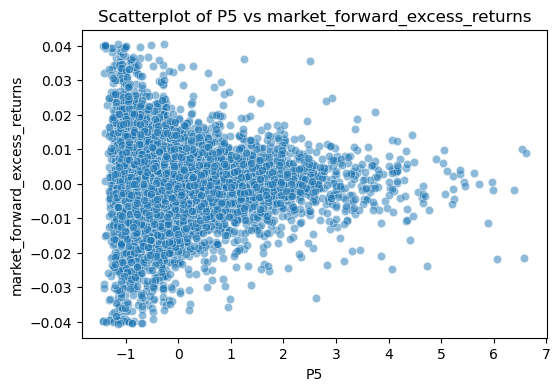

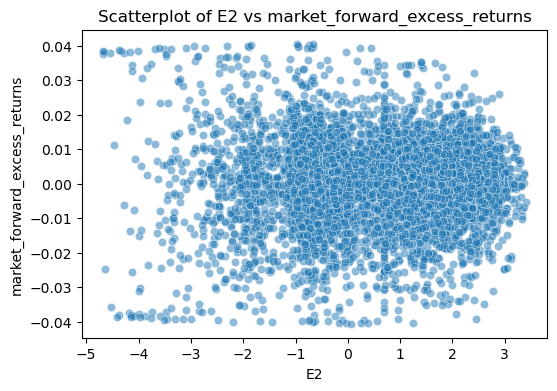

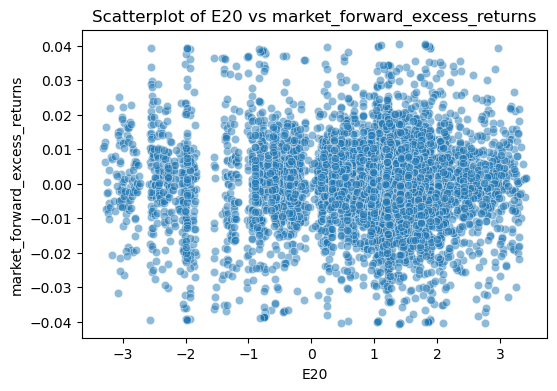

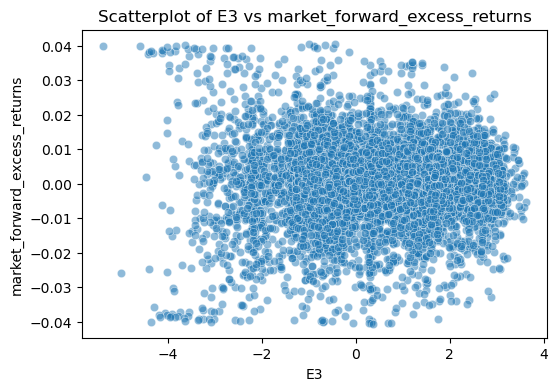

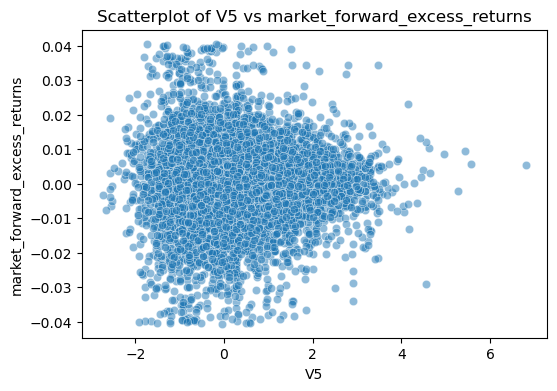

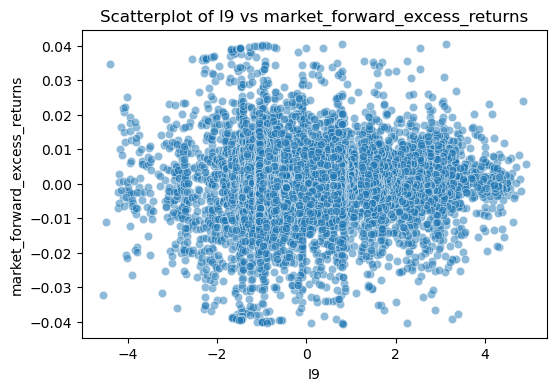

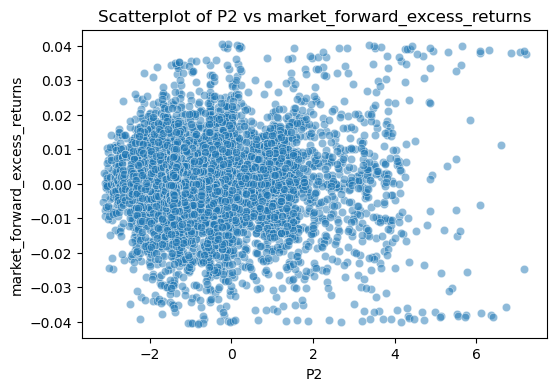

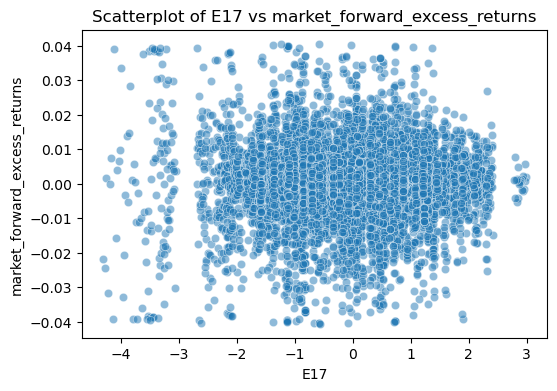

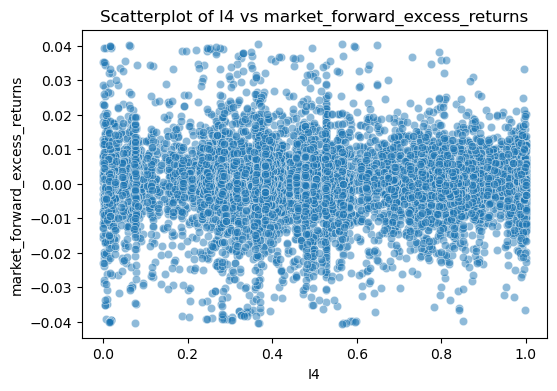

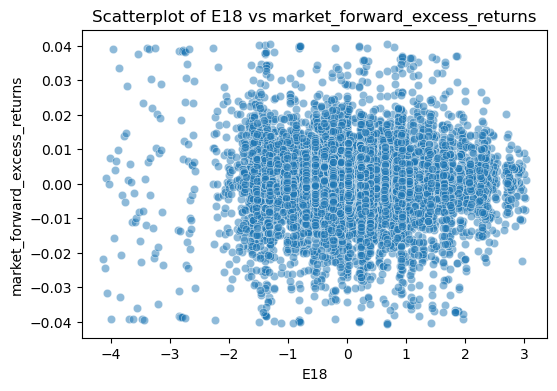

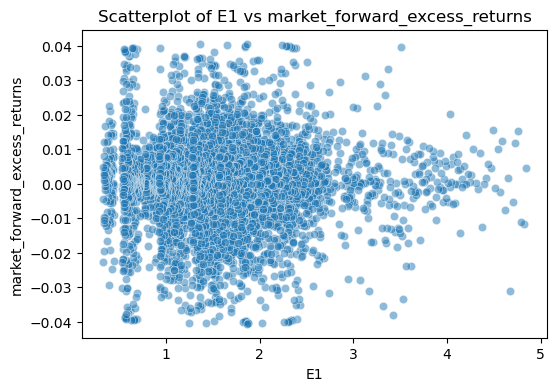

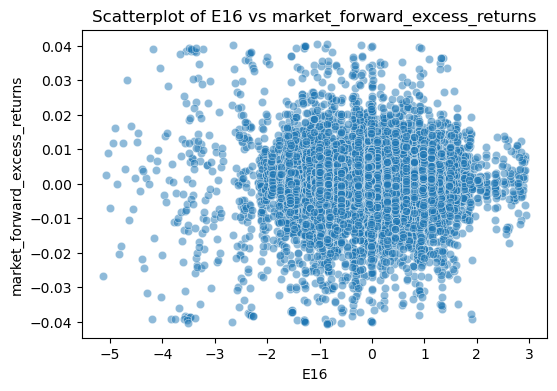

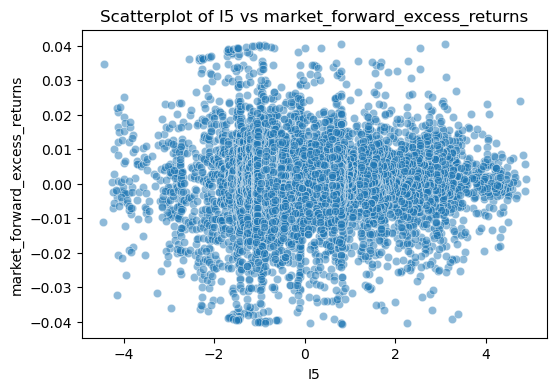

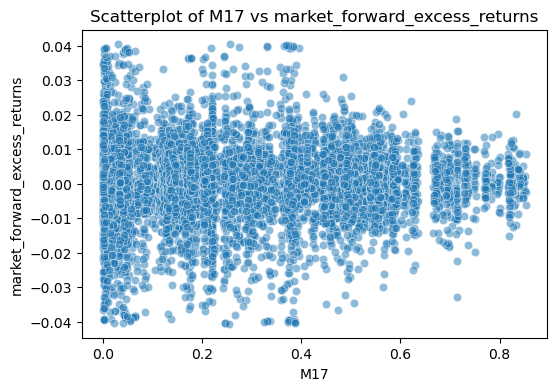

In [19]:
# Replace with your actual top 20 list
top20 = ['E19', 'V7', 'V13', 'S8', 'P5', 'E2', 'E20',
        'E3', 'V5', 'I9', 'P2', 'E17', 'I4', 'E18', 
        'E1', 'E16', 'I5', 'M17']

target = "market_forward_excess_returns"

# Loop through features and plot
for col in top20:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.5)
    plt.title(f"Scatterplot of {col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


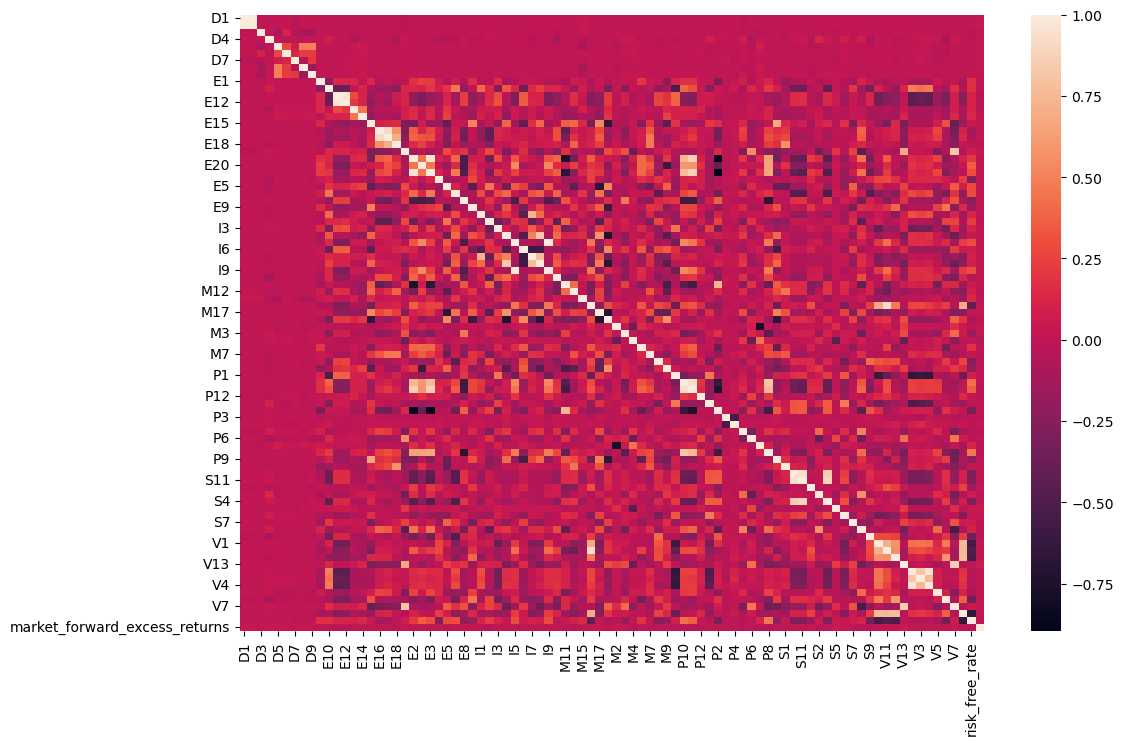

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.show()

In [25]:
from sklearn.feature_selection import mutual_info_regression

# X = your features, y = your target
X = df.drop(columns=['market_forward_excess_returns'])  
y = df['market_forward_excess_returns']

# Compute MI
mi_scores = mutual_info_regression(X, y, random_state=42)

# Put results into a dataframe
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi_scores.head(20))  # top 20 features by MI

E19    0.105142
V7     0.101085
V13    0.084353
S8     0.081843
P5     0.072926
E2     0.070992
E20    0.066803
E3     0.065296
V5     0.061818
I9     0.057228
P2     0.053952
E18    0.053913
E17    0.053298
I4     0.052349
E16    0.052322
E1     0.052188
E12    0.051789
M17    0.051775
I5     0.051249
P10    0.050148
dtype: float64


In [21]:
df = df.drop(['forward_returns'], axis=1)

In [22]:
df = df.drop(['date_id'], axis =1)

In [23]:
from importlib import reload
import matplotlib
plt = reload(matplotlib.pyplot)

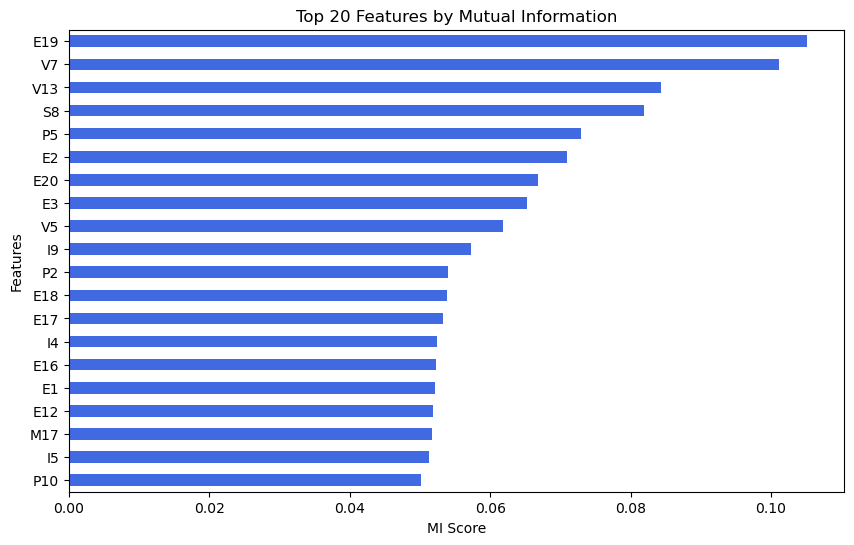

In [26]:
top20 = mi_scores.head(20)

plt.figure(figsize=(10,6))
top20.sort_values().plot(kind="barh", color="royalblue")
plt.title("Top 20 Features by Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()

In [27]:
top20_features = mi_scores.head(20).index.tolist()

print("Top 20 features:", top20_features)

Top 20 features: ['E19', 'V7', 'V13', 'S8', 'P5', 'E2', 'E20', 'E3', 'V5', 'I9', 'P2', 'E18', 'E17', 'I4', 'E16', 'E1', 'E12', 'M17', 'I5', 'P10']


In [28]:
X = df[top20_features]
y = df['market_forward_excess_returns']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
print(lm.intercept_)

0.0004036278058586163


In [35]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
E19    -0.000131
V7     -0.000392
V13     0.001065
S8      0.000221
P5     -0.000345
E2     -0.000334
E20    -0.000088
E3      0.000513
V5     -0.000064
I9      0.001727
P2      0.000160
E18    -0.000007
E17     0.000368
I4      0.000571
E16    -0.000091
E1      0.000324
E12    -0.000456
M17     0.000154
I5     -0.001484
P10    -0.000693

In [39]:
predictions = lm.predict(X_test)

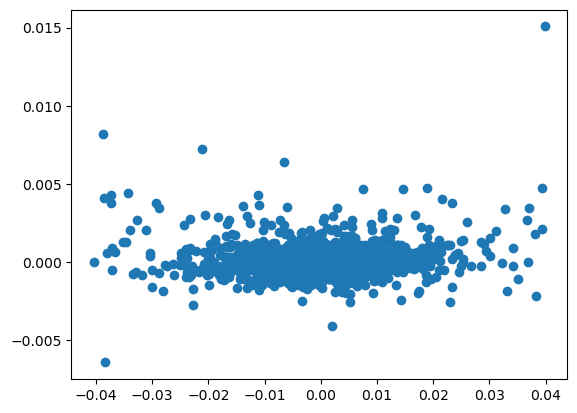

In [40]:
plt.scatter(y_test,predictions)
plt.show()

In [41]:
from sklearn import metrics

In [42]:
import numpy as np

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.007253812817597387
MSE: 0.00010502138540096429
RMSE: 0.010247994213550488


In [44]:
import joblib

In [46]:
joblib.dump(lm, 'linear_model.pkl')
joblib.dump(top20_features, 'top20_features.pkl')

['top20_features.pkl']

In [47]:
df_test = pd.read_csv('test.csv')

In [48]:
df_test.head()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...        V4        V5  \
0     8980   0   0   0   0   1   0   0   1   0  ...  0.828042  0.999172   
1     8981   0   0   0   0   1   0   0   1   0  ...  0.831349  1.120336   
2     8982   0   0   0   0   1   0   0   0   1  ...  0.832672  1.088992   
3     8983   0   0   0   0   1   0   0   0   1  ...  0.835979  1.040988   
4     8984   0   0   0   0   0   0   1   0   1  ...  0.839947  0.944593   

         V6        V7        V8        V9  is_scored  lagged_forward_returns  \
0  0.759921 -0.803127  0.170966 -0.751909       True                0.003541   
1  0.556217 -0.686192  0.141865 -0.660326       True               -0.005964   
2  0.665344 -0.459367  0.199405 -0.510979       True               -0.007410   
3  0.594577 -0.561643  0.161706 -0.575997       True                0.005420   
4  0.715608 -0.692649  0.124669 -0.654045       True                0.008357   

   lagged_risk_free_rate  lagged_market_forward_excess_returns  
0               0.000161                              0.003068  
1               0.000162                             -0.006437  
2               0.000160                             -0.007882  
3               0.000160                              0.004949  
4               0.000159                              0.007887  

[5 rows x 99 columns]

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 99 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date_id                               10 non-null     int64  
 1   D1                                    10 non-null     int64  
 2   D2                                    10 non-null     int64  
 3   D3                                    10 non-null     int64  
 4   D4                                    10 non-null     int64  
 5   D5                                    10 non-null     int64  
 6   D6                                    10 non-null     int64  
 7   D7                                    10 non-null     int64  
 8   D8                                    10 non-null     int64  
 9   D9                                    10 non-null     int64  
 10  E1                                    10 non-null     float64
 11  E10                   

In [50]:
import joblib

In [52]:
lm = joblib.load('linear_model.pkl')

In [53]:
print(lm)

LinearRegression()


In [54]:
top20_features = joblib.load("top20_features.pkl")

In [55]:
print(top20_features)

['E19', 'V7', 'V13', 'S8', 'P5', 'E2', 'E20', 'E3', 'V5', 'I9', 'P2', 'E18', 'E17', 'I4', 'E16', 'E1', 'E12', 'M17', 'I5', 'P10']


In [56]:
X_test = df_test[top20_features]

In [58]:
predictions = lm.predict(X_test)

In [59]:
print("Predictions shape:", predictions.shape)

Predictions shape: (10,)


In [60]:
print(predictions)

[-4.09847991e-04 -3.86955169e-04  3.20275325e-04 -5.39561297e-05
 -2.16808962e-04 -4.12616086e-04 -6.19736141e-04 -3.52935630e-04
 -1.99104897e-04 -3.29032178e-04]


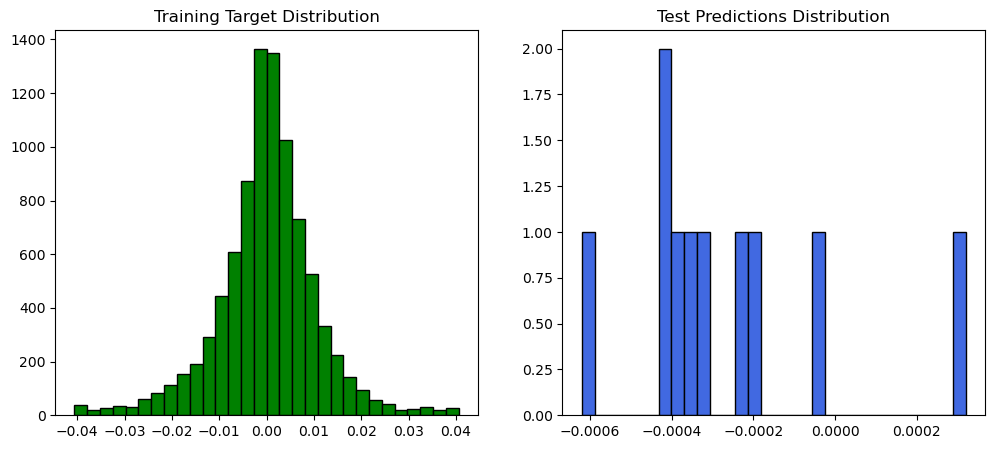

In [64]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(y, bins=30, color="green", edgecolor="k")
plt.title("Training Target Distribution")

plt.subplot(1,2,2)
plt.hist(predictions, bins=30, color="royalblue", edgecolor="k")
plt.title("Test Predictions Distribution")

plt.show()


In [76]:
submission_lr = pd.DataFrame({
    'date_id': df_test['date_id'],
    'market_forward_excess_returns': lm.predict
})
submission_lr.to_csv('submission_linear.csv', index=False)

In [77]:
#RANDOM FOREST REGRESSOR

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

In [67]:
X_train, X_val, y_train, y_val = train_test_split(
    df[top20_features], df['market_forward_excess_returns'], test_size=0.2, random_state=42
)

In [68]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [69]:
val_preds = rf.predict(X_val)

In [70]:
print("MAE:", mean_absolute_error(y_val, val_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_val, val_preds)))
print("Explained variance:", explained_variance_score(y_val, val_preds))

MAE: 0.007737723991939386
RMSE: 0.010912328636877423
Explained variance: -0.0696573618997387


In [74]:
joblib.dump(rf, 'RandomForestRegressor.pkl')
joblib.dump(top20_features, 'top20_features.pkl')

['top20_features.pkl']

In [71]:
X_test = df_test[top20_features]
test_preds = rf.predict(X_test)

In [72]:
print(test_preds)

[-3.35061742e-03 -4.09580813e-05  3.27733946e-03  6.50520500e-05
 -2.20870192e-03  1.49264837e-03 -2.30882844e-04  1.07223841e-03
 -1.01431146e-03 -7.57527871e-04]


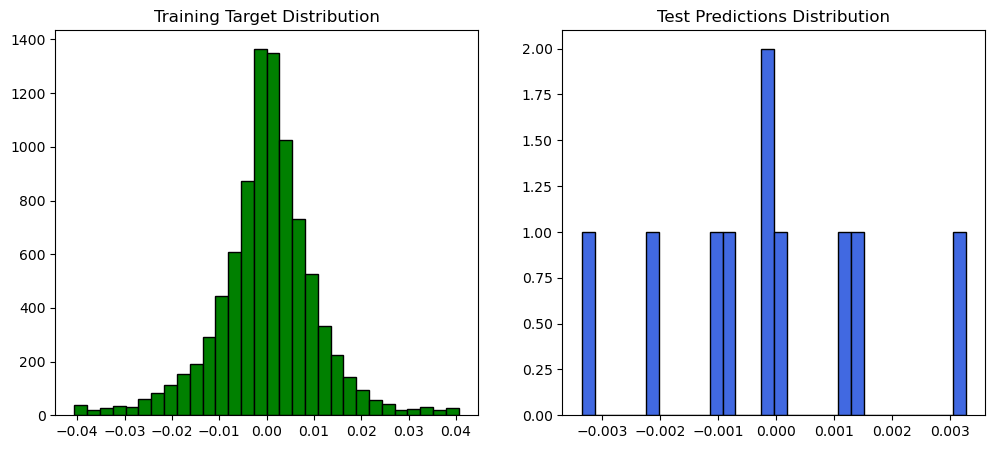

In [73]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(y, bins=30, color="green", edgecolor="k")
plt.title("Training Target Distribution")

plt.subplot(1,2,2)
plt.hist(test_preds, bins=30, color="royalblue", edgecolor="k")
plt.title("Test Predictions Distribution")

plt.show()


In [78]:
submission_rf = pd.DataFrame({
    'date_id': df_test['date_id'],
    'market_forward_excess_returns': rf.predict
})
submission_lr.to_csv('submission_rf.csv', index=False)